In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


In [11]:
X_train = np.load('x_train.npy')

In [12]:
x_train = pd.DataFrame(X_train)

In [13]:
x_train

,0
0,-1.283572
1,-0.382959
2,-0.630463
3,1.859296
4,-1.506802
...,...
95,-1.347039
96,-0.017776
97,0.059258
98,-2.886533


In [14]:
X_test = np.load('x_test (1).npy')

In [15]:
x_test = pd.DataFrame(X_test)

In [16]:
Y_train = np.load('y_train.npy')

In [17]:
y_train = pd.DataFrame(Y_train)

In [18]:
Y_test = np.load('y_test.npy')

In [19]:
y_test = pd.DataFrame(Y_test)

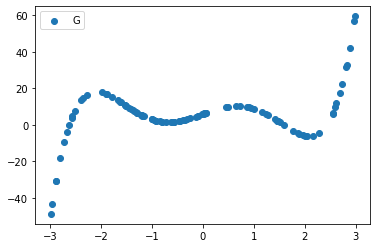

In [26]:
# visualize 
plt.scatter(x_train, y_train)
plt.legend('GT')
plt.show()


In [27]:
def param_init(X): 

    params = {} # initialize dictionary 
    _, n_features = X.shape # shape of training data

    # initializing coefficents to 0 
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params

In [28]:
def gradient_descent(X, y, params, alpha, n_iter): 
  
    W = params["W"] 
    b = params["b"]
    m = X.shape[0] # number of training instances 

    for _ in range(n_iter): 
        # prediction with random weights
        y_pred = np.dot(X, W) + b
        # taking the partial derivative of coefficients
        dW = (2/m) * np.dot(X.T, (y_pred - y)) 
        db = (2/m) * np.sum(y_pred -  y)
        # updates to coefficients
        W -= alpha * dW
        b -= alpha * db 
    
    params["W"] = W
    params["b"] = b
    return params

In [29]:
def train(X, y, alpha=0.01, n_iter=1000):

    init_params = param_init(X)
    params = gradient_descent(X, y, init_params, alpha, n_iter)
    return params

In [32]:
def predict(x_test, params):

    y_preds = np.dot(x_test, params["W"]) + params["b"]
    return y_preds

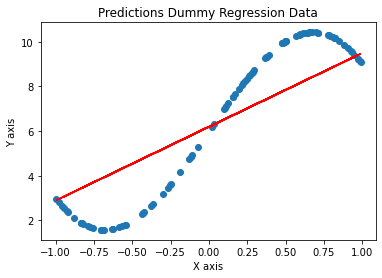

In [35]:
params = train(X_train, Y_train) # train model
y_preds = predict(X_test, params) # inference
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Regression Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

Yes, it can be seen from the below graph it is a linear relationship

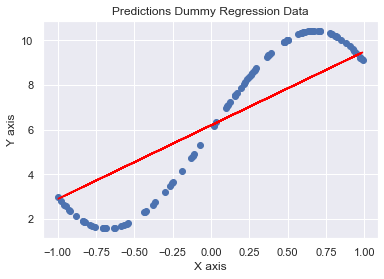

In [167]:
params = train(X_train, Y_train) # train model
y_preds = predict(X_test, params) # inference
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Regression Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [176]:
data = pd.read_csv("Hogsmeade_Prices.csv")


In [177]:
x = data.iloc[:,0:12]

In [178]:
y = data.iloc[:,-1]

In [179]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [180]:
x

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1


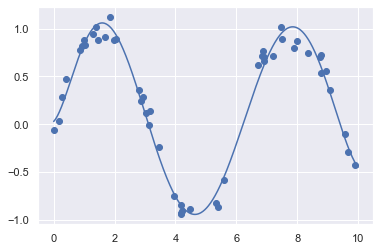

In [183]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


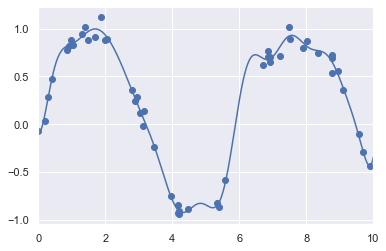

In [184]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [191]:
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import linear_model
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)

cls.fit(X_train, Y_train)

scoreOfModel = cls.score(X_train, Y_train)


print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.997702452658367


In [192]:
pred = cls.predict(X_test)

In [193]:
r2_score(Y_test, pred)

0.98335653629159

In [39]:
print(np.sqrt(mean_squared_error(Y_test, y_preds)))

1.6792398713905197


# Correlation Matrix with HeatMap

In [93]:
data = pd.read_csv("Hogsmeade_Prices.csv")
data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1,82.9


In [113]:
corr = data.corr()["Price (1000$)"]

In [114]:
corr

House ID             0.180825
Local Price          0.923124
Bathrooms            0.925164
Land Area            0.666297
Living area          0.921688
# Garages            0.461632
# Rooms              0.777415
# Bedrooms           0.701030
Age of home         -0.298990
Construction type    0.173323
Architecture type   -0.022509
# Fire places        0.489920
Price (1000$)        1.000000
Name: Price (1000$), dtype: float64

In [115]:
import seaborn as sns

<AxesSubplot:>

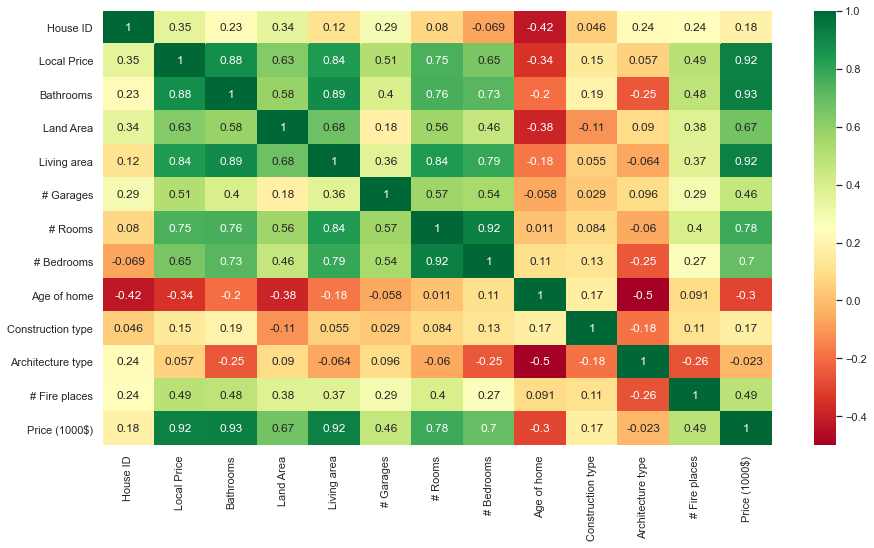

In [119]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn')